## Общий вид

параметры $a = 0.2, b = 0.2, c = 5.7$ – стандартные параметры выбранные Рёсслером для изучения

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import plotly.graph_objects as go
from scipy.integrate import solve_ivp
%config InlineBackend.figure_format='retina'

In [145]:
def rossler3(X, t, a, b, c):
    x, y, z = X
    return np.array([-y - z, x + a * y, b + z * (x - c)])

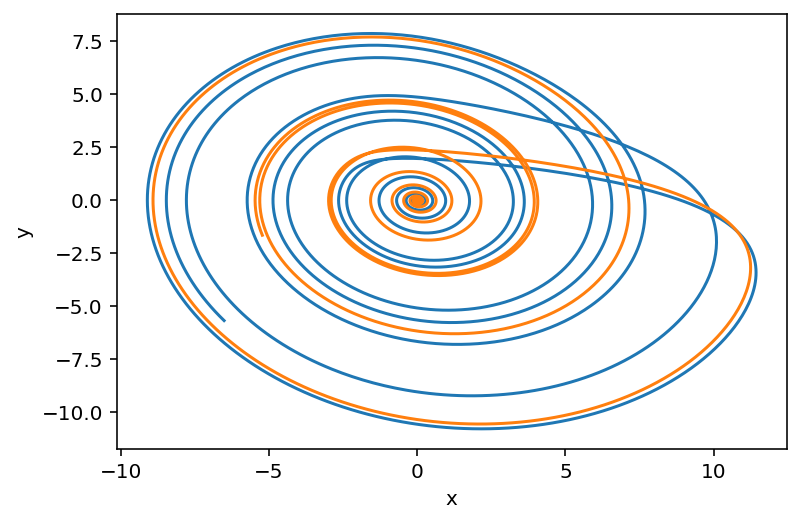

In [153]:
trajectory1 = odeint(
    rossler3, np.array([.1, .1, .1]), np.linspace(0, 70, 5000), args=(0.2, 0.2, 5.7)
)
trajectory2 = odeint(
    rossler3, np.array([.0001, .0001, .0001]), np.linspace(0, 70, 5000), args=(0.2, 0.2, 5.7)
)

plt.plot(trajectory1[:, 0], trajectory1[:, 1])
plt.plot(trajectory2[:, 0], trajectory2[:, 1])
plt.xlabel('x')
plt.ylabel('y');

In [148]:
go.Figure(
    [
        go.Scatter3d(
            x=trajectory1[:, 0], y=trajectory1[:, 1], z=trajectory1[:, 2], mode="lines"
        ),
        go.Scatter3d(
            x=trajectory2[:, 0], y=trajectory2[:, 1], z=trajectory2[:, 2], mode="lines"
        ),
    ]
)

## Особые точки

In [105]:
a,b,c = (0.2, 0.2, 5.7)

fixedx1 = 1/2 * (c + np.sqrt(c ** 2 - 4*a*b)) 
fixedy1 = 1/(2 * a) * (- c - np.sqrt(c ** 2 - 4*a*b)) 
fixedz1 = 1/(2 * a) * (c + np.sqrt(c ** 2 - 4*a*b)) 
fixed1 = [fixedx1, fixedy1, fixedz1]
fixedx2 = 1/2 * (c - np.sqrt(c ** 2 - 4*a*b)) 
fixedy2 = 1/(2 * a) * (- c + np.sqrt(c ** 2 - 4*a*b)) 
fixedz2 = 1/(2 * a) * (c - np.sqrt(c ** 2 - 4*a*b)) 
fixed2 = [fixedx2, fixedy2, fixedz2]
t = [0.7073, -0.07278, 0.0042]
fixed = np.row_stack([fixed1, fixed2, t])

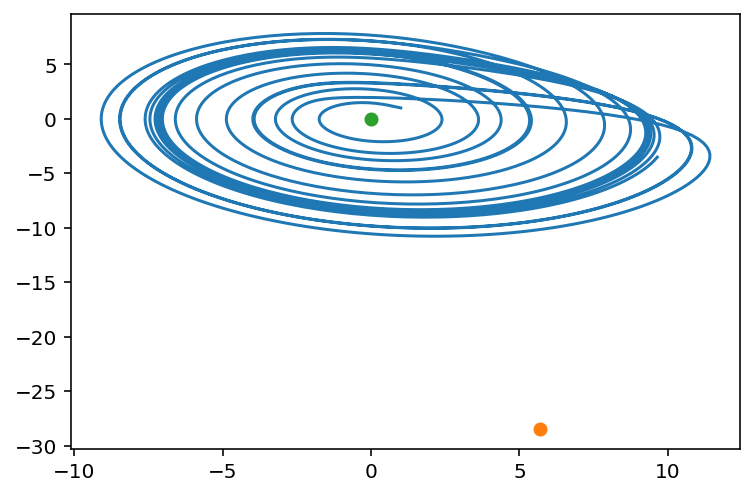

In [69]:
plt.plot(trajectory1[:, 0], trajectory1[:, 1])
plt.plot(fixed1[0], fixed1[1], 'o')
plt.plot(fixed2[0], fixed2[1], 'o')

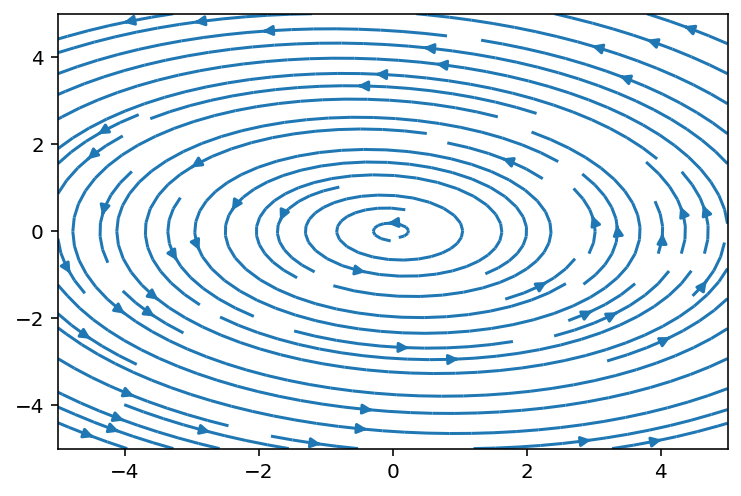

In [144]:
x = np.linspace(-5, 5)
y = np.linspace(-5, 5)
X, Y = np.meshgrid(x, y)
plt.streamplot(X, Y, *rossler3([X, Y, Y], 0, .2, .2, 5.7)[0:2])

In [103]:
import plotly
plotly.__version__

'4.4.1'

In [104]:
import plotly.express as px

t = [10, 10]

fig = px.line_3d(
            x=trajectory1[:, 0], y=trajectory1[:, 1], z=trajectory1[:, 2], 
        )
fig.add_trace(px.scatter_3d(x=fixed[:,0], y=fixed[:,1], z=fixed[:,2], color=t).data[0])

fig.write_html('test.html', include_plotlyjs=False)

In [107]:
go.Figure(
    [
        go.Scatter3d(
            x=trajectory1[:, 0], y=trajectory1[:, 1], z=trajectory1[:, 2], mode="lines"
        ),
        go.Scatter3d(
            x=fixed[:,0], y=fixed[:,1], z=fixed[:,2], mode="markers"
        ),
    ]
)

## Собственные векторы

In [120]:
eug1 = [[0.7073, 0.07278, 0.0042],
        [0.1682, -0.0286, 0.9853],
        [0.1682, -0.0286, 0.9853]]

vects = []
for i in eug1:
    vects.append(np.row_stack([[0,0,0], i]) * 10 + fixed2)

In [121]:
import plotly.figure_factory as ff

go.Figure(
    [
        go.Scatter3d(
            x=trajectory1[:, 0], y=trajectory1[:, 1], z=trajectory1[:, 2], mode="lines"
        ),
        go.Scatter3d(x=vects[0][:,0], y=vects[0][:,1], z=vects[0][:,2],mode="lines"),
        go.Scatter3d(x=vects[1][:,0], y=vects[1][:,1], z=vects[1][:,2],mode="lines"),
        go.Scatter3d(x=vects[2][:,0], y=vects[2][:,1], z=vects[2][:,2],mode="lines") 
    ]
)

## Бифуркации

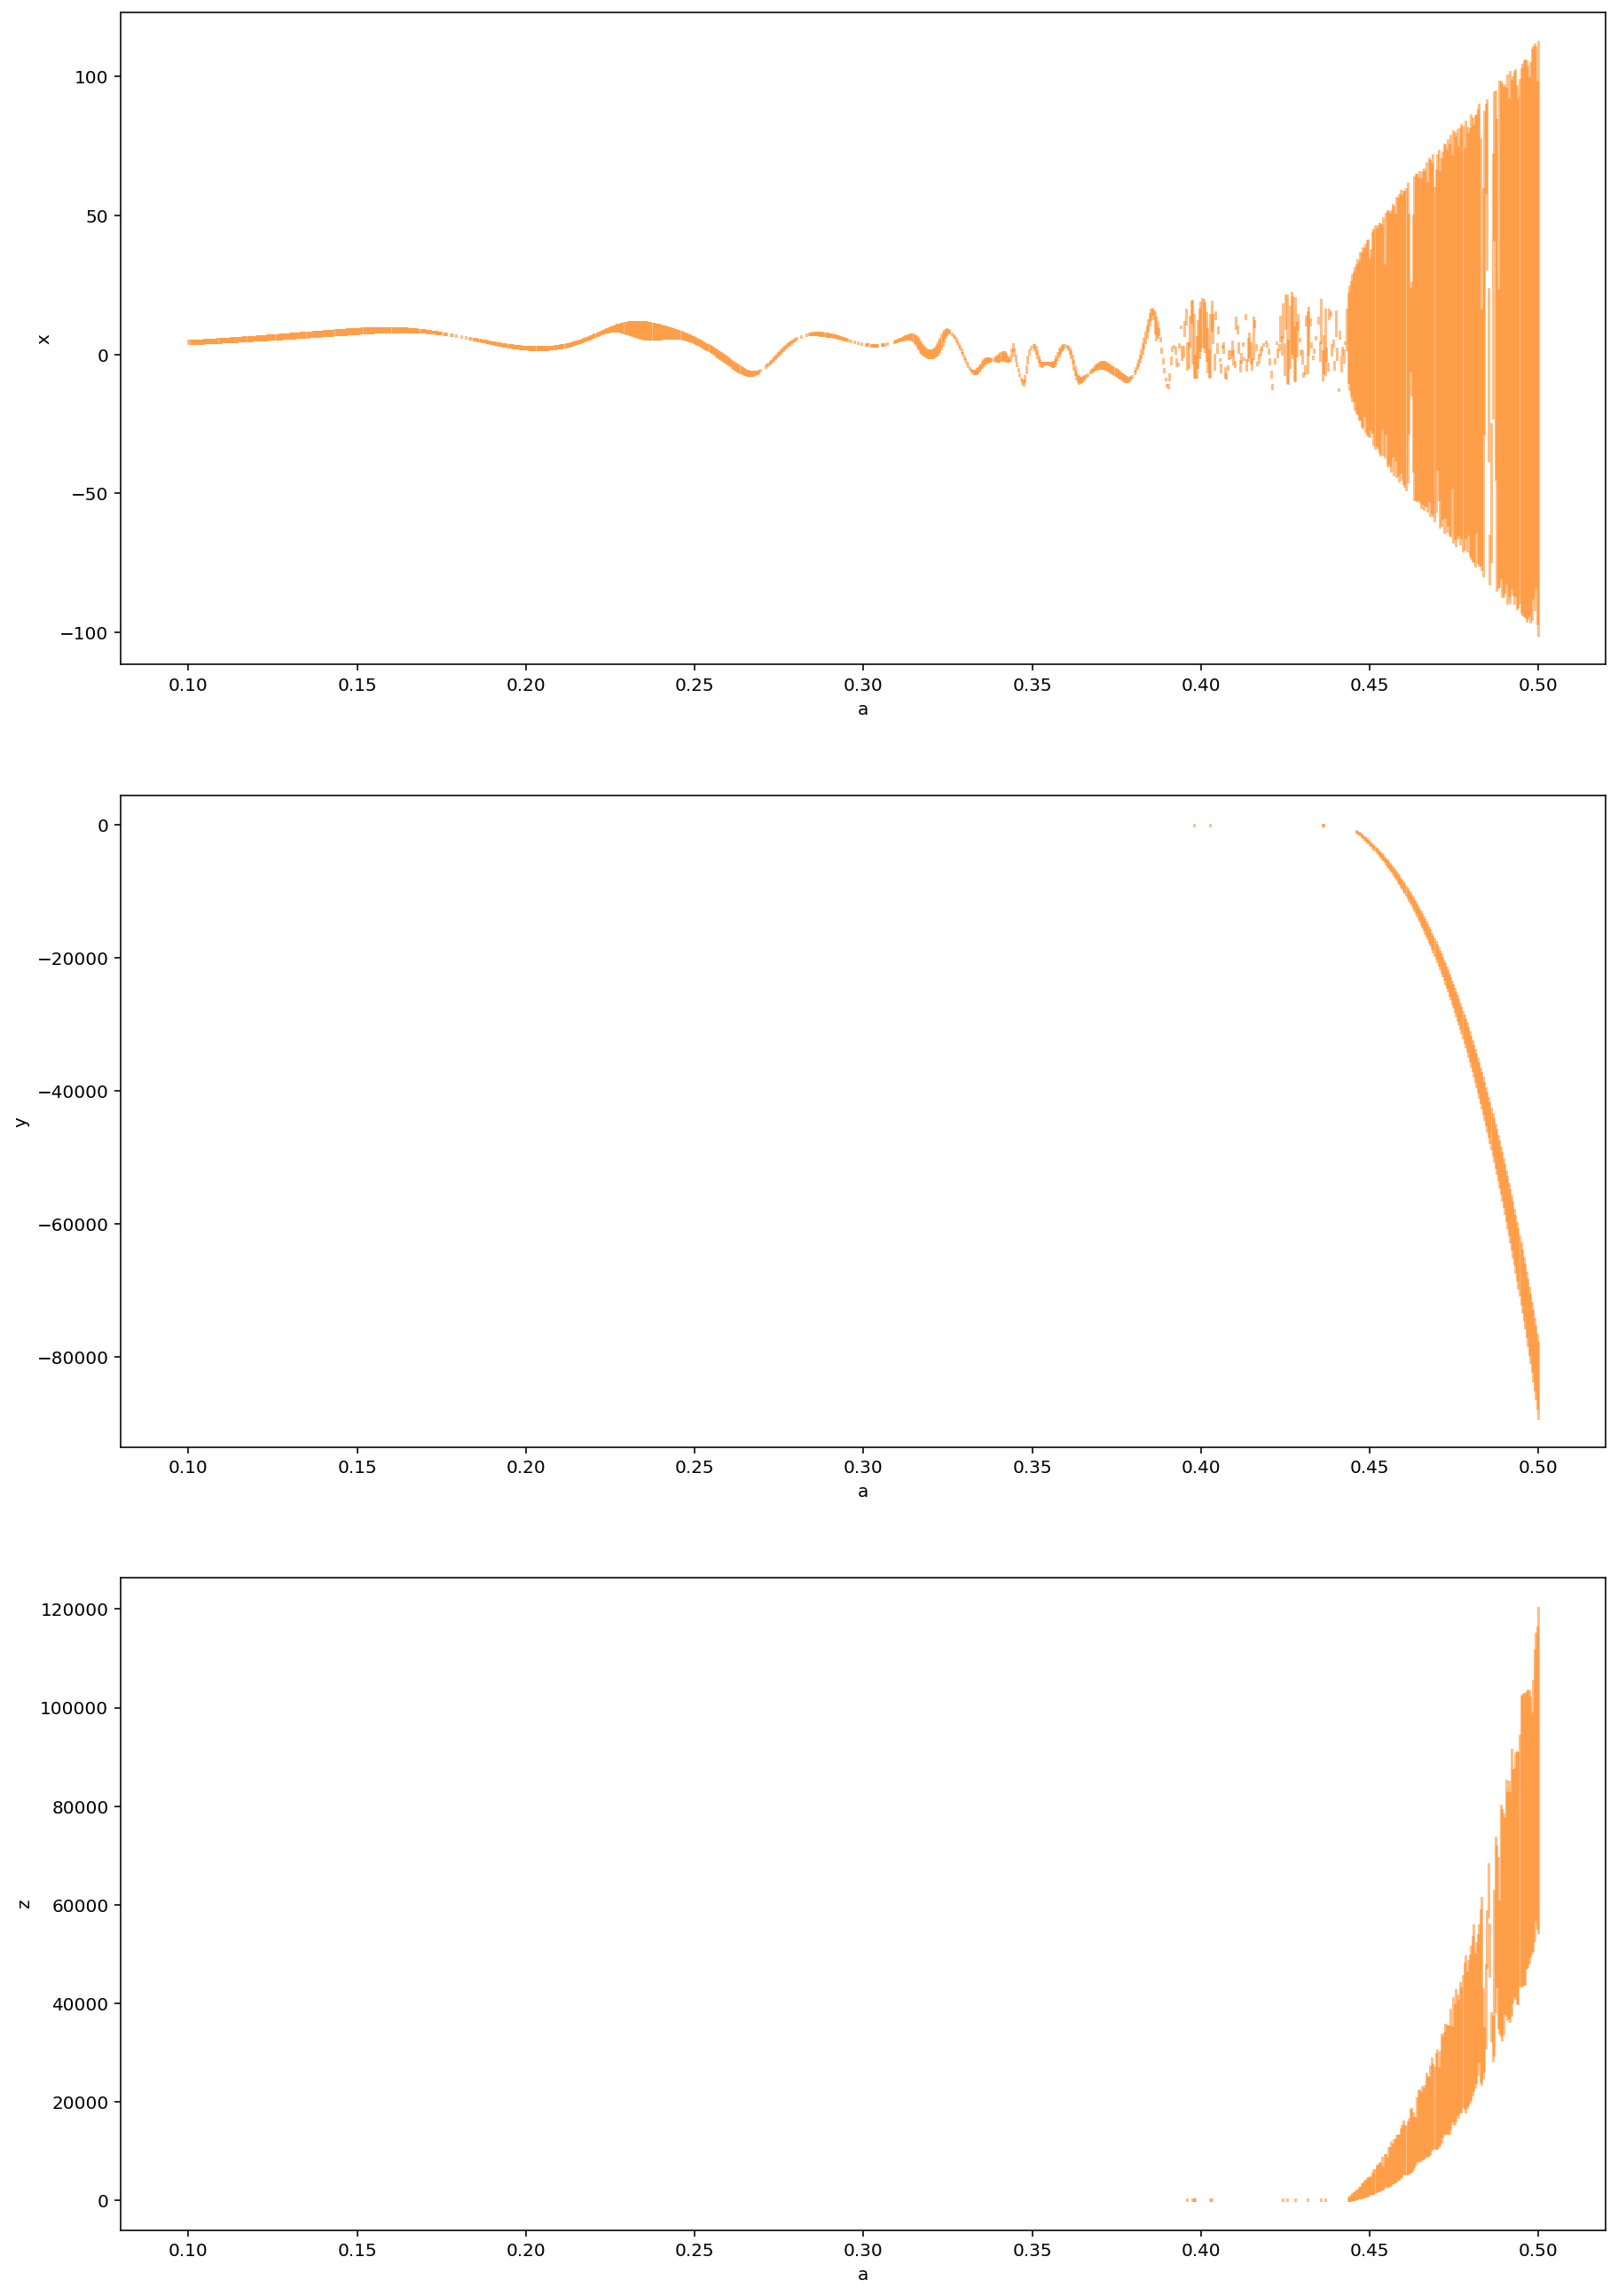

In [138]:
iters = 100
pts = 10
fig, ax = plt.subplots(3, 1, figsize=(15, 23))
dim = ['x', 'y', 'z']

for a in np.linspace(0.1, 0.5, 1000):
    traj = odeint(
        rossler3, np.array([1, 1, 1]), np.linspace(0, 30, 1000), args=(a, 0.2, 5.7),
        )
    for i in range(3):
        ax[i].plot([a] * pts, traj[-pts:,i], '', color='C1', markersize=0.1, alpha=0.5)
        ax[i].set_xlabel('a')
        ax[i].set_ylabel(dim[i])

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



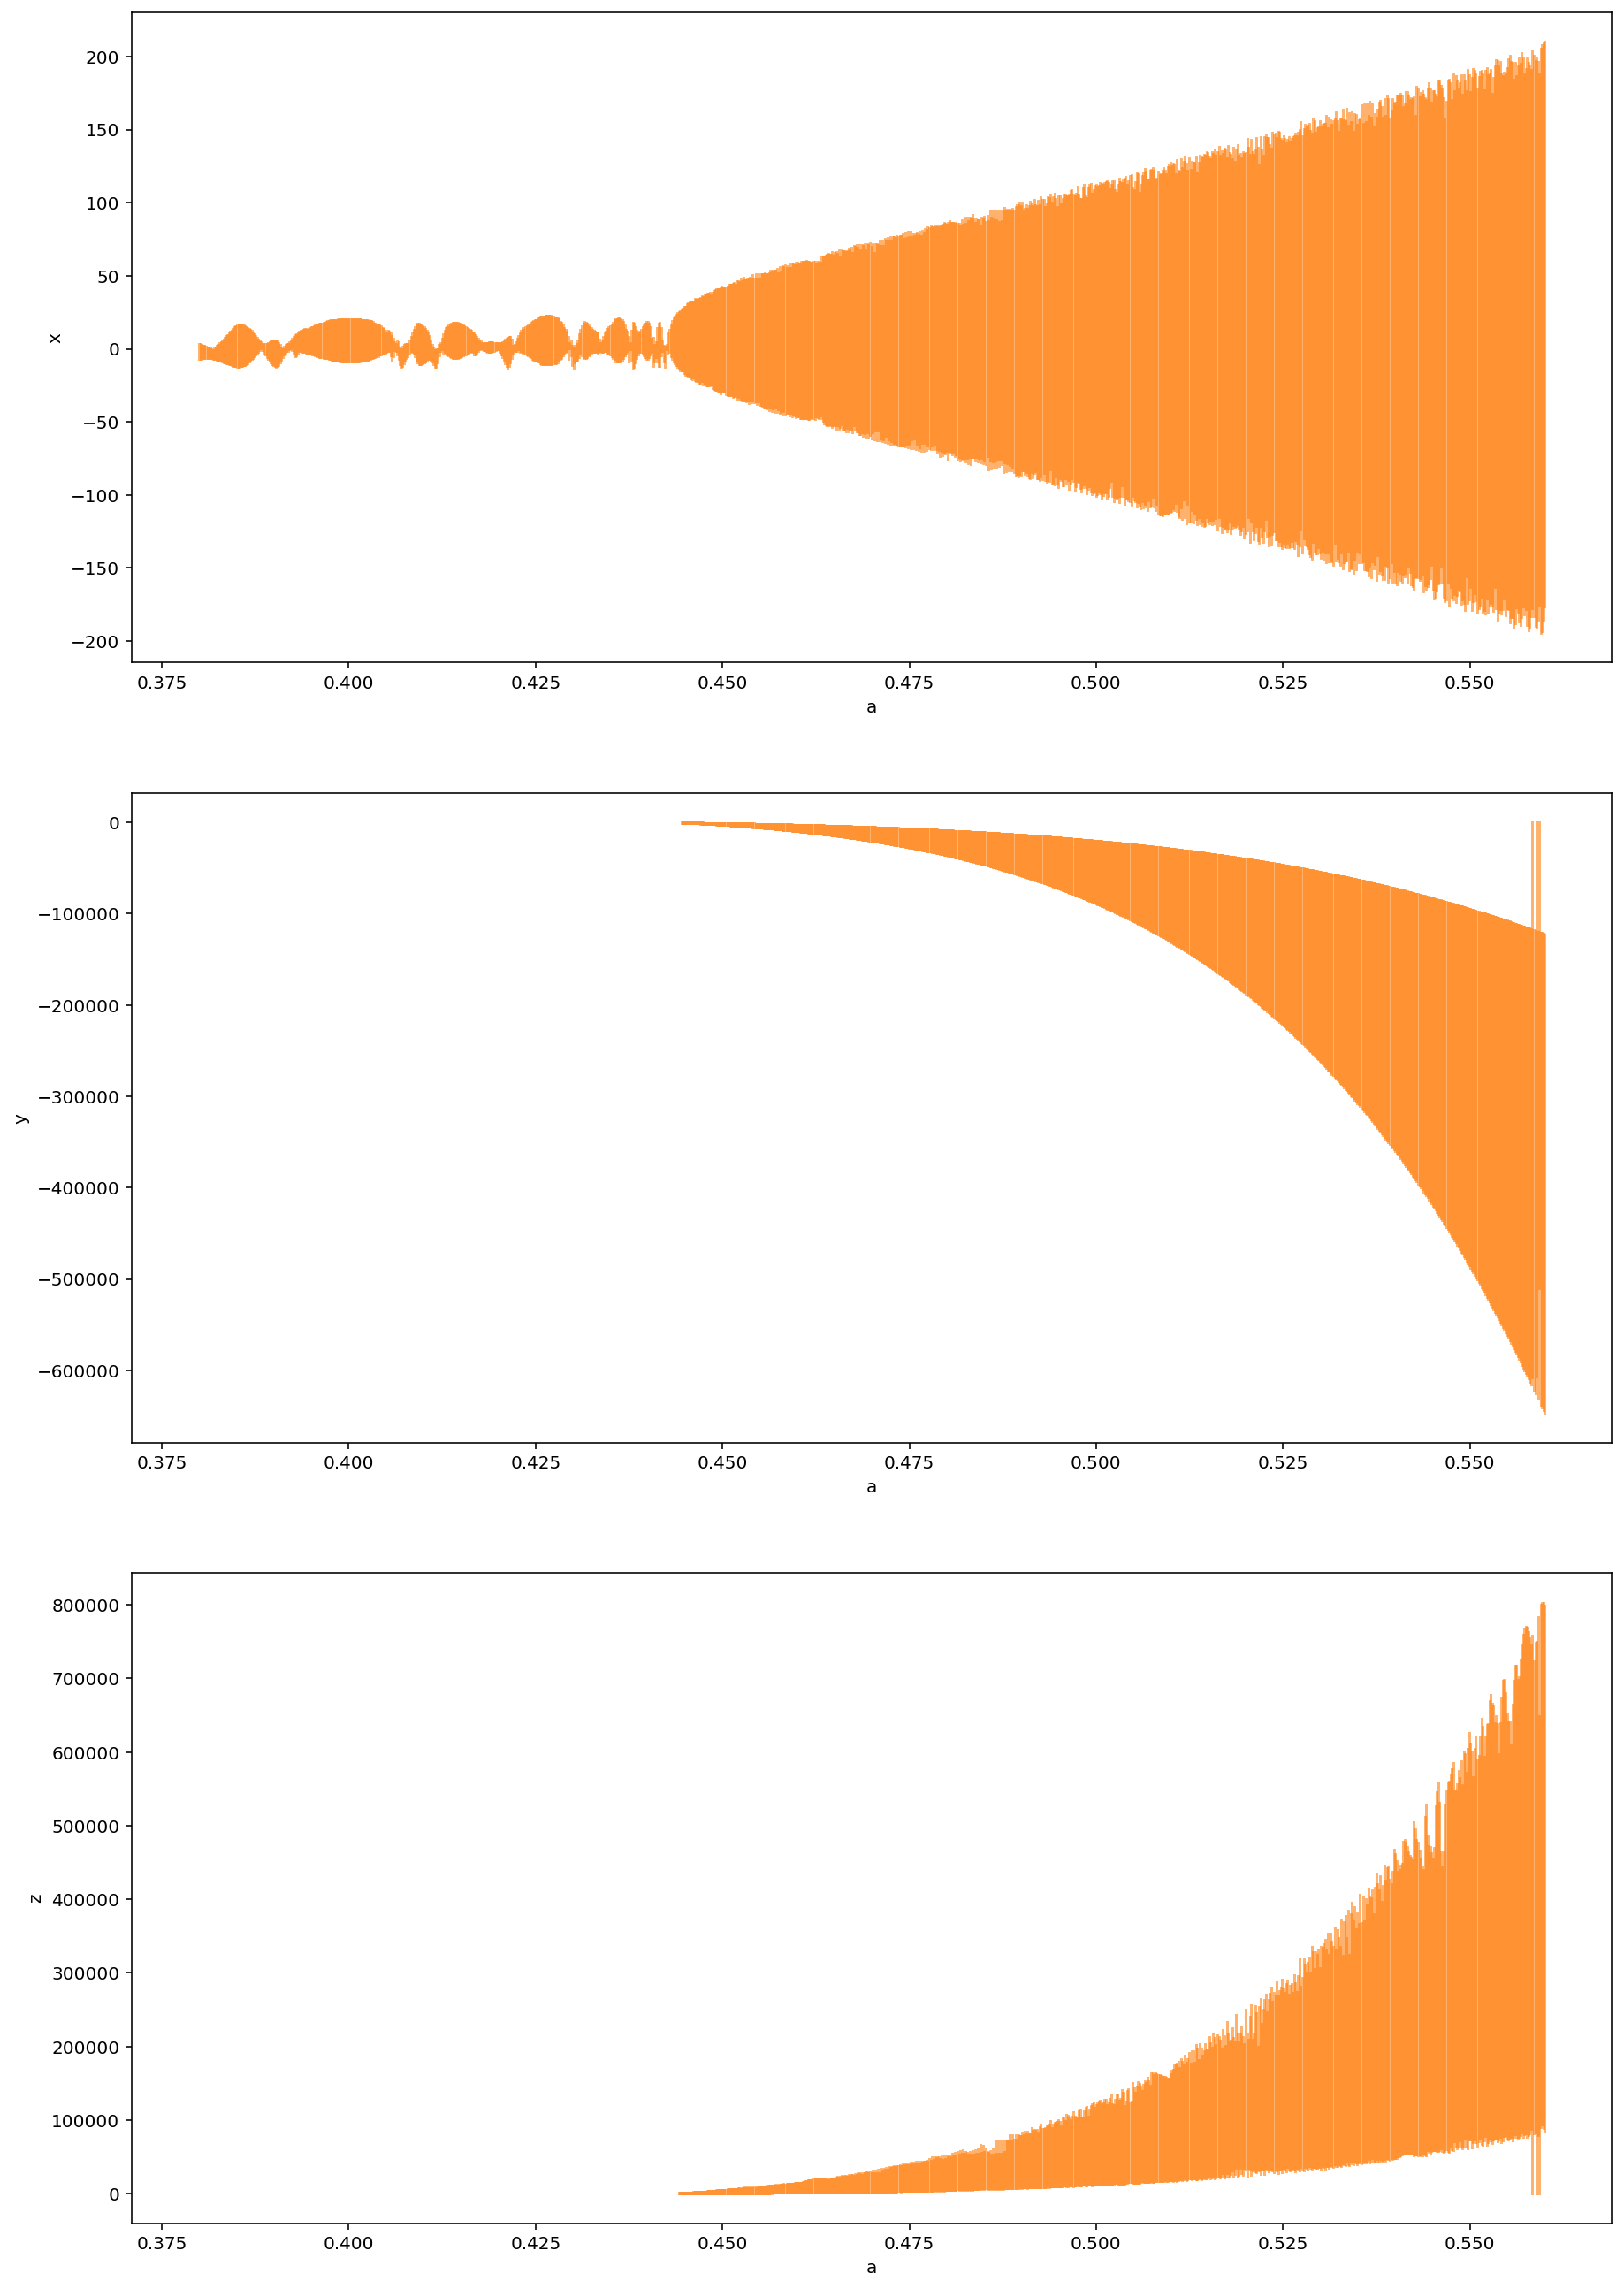

In [139]:
pts = 100
fig, ax = plt.subplots(3, 1, figsize=(15, 23))

for a in np.linspace(0.38, 0.56, 1000):
    traj = odeint(
        rossler3, np.array([1, 1, 1]), np.linspace(0, 30, 1000), args=(a, 0.2, 5.7)
        )
    for i in range(3):
        ax[i].plot([a] * pts, traj[-pts:,i], '', color='C1', markersize=0.1, alpha=0.6)
        ax[i].set_xlabel('a')
        ax[i].set_ylabel(dim[i])

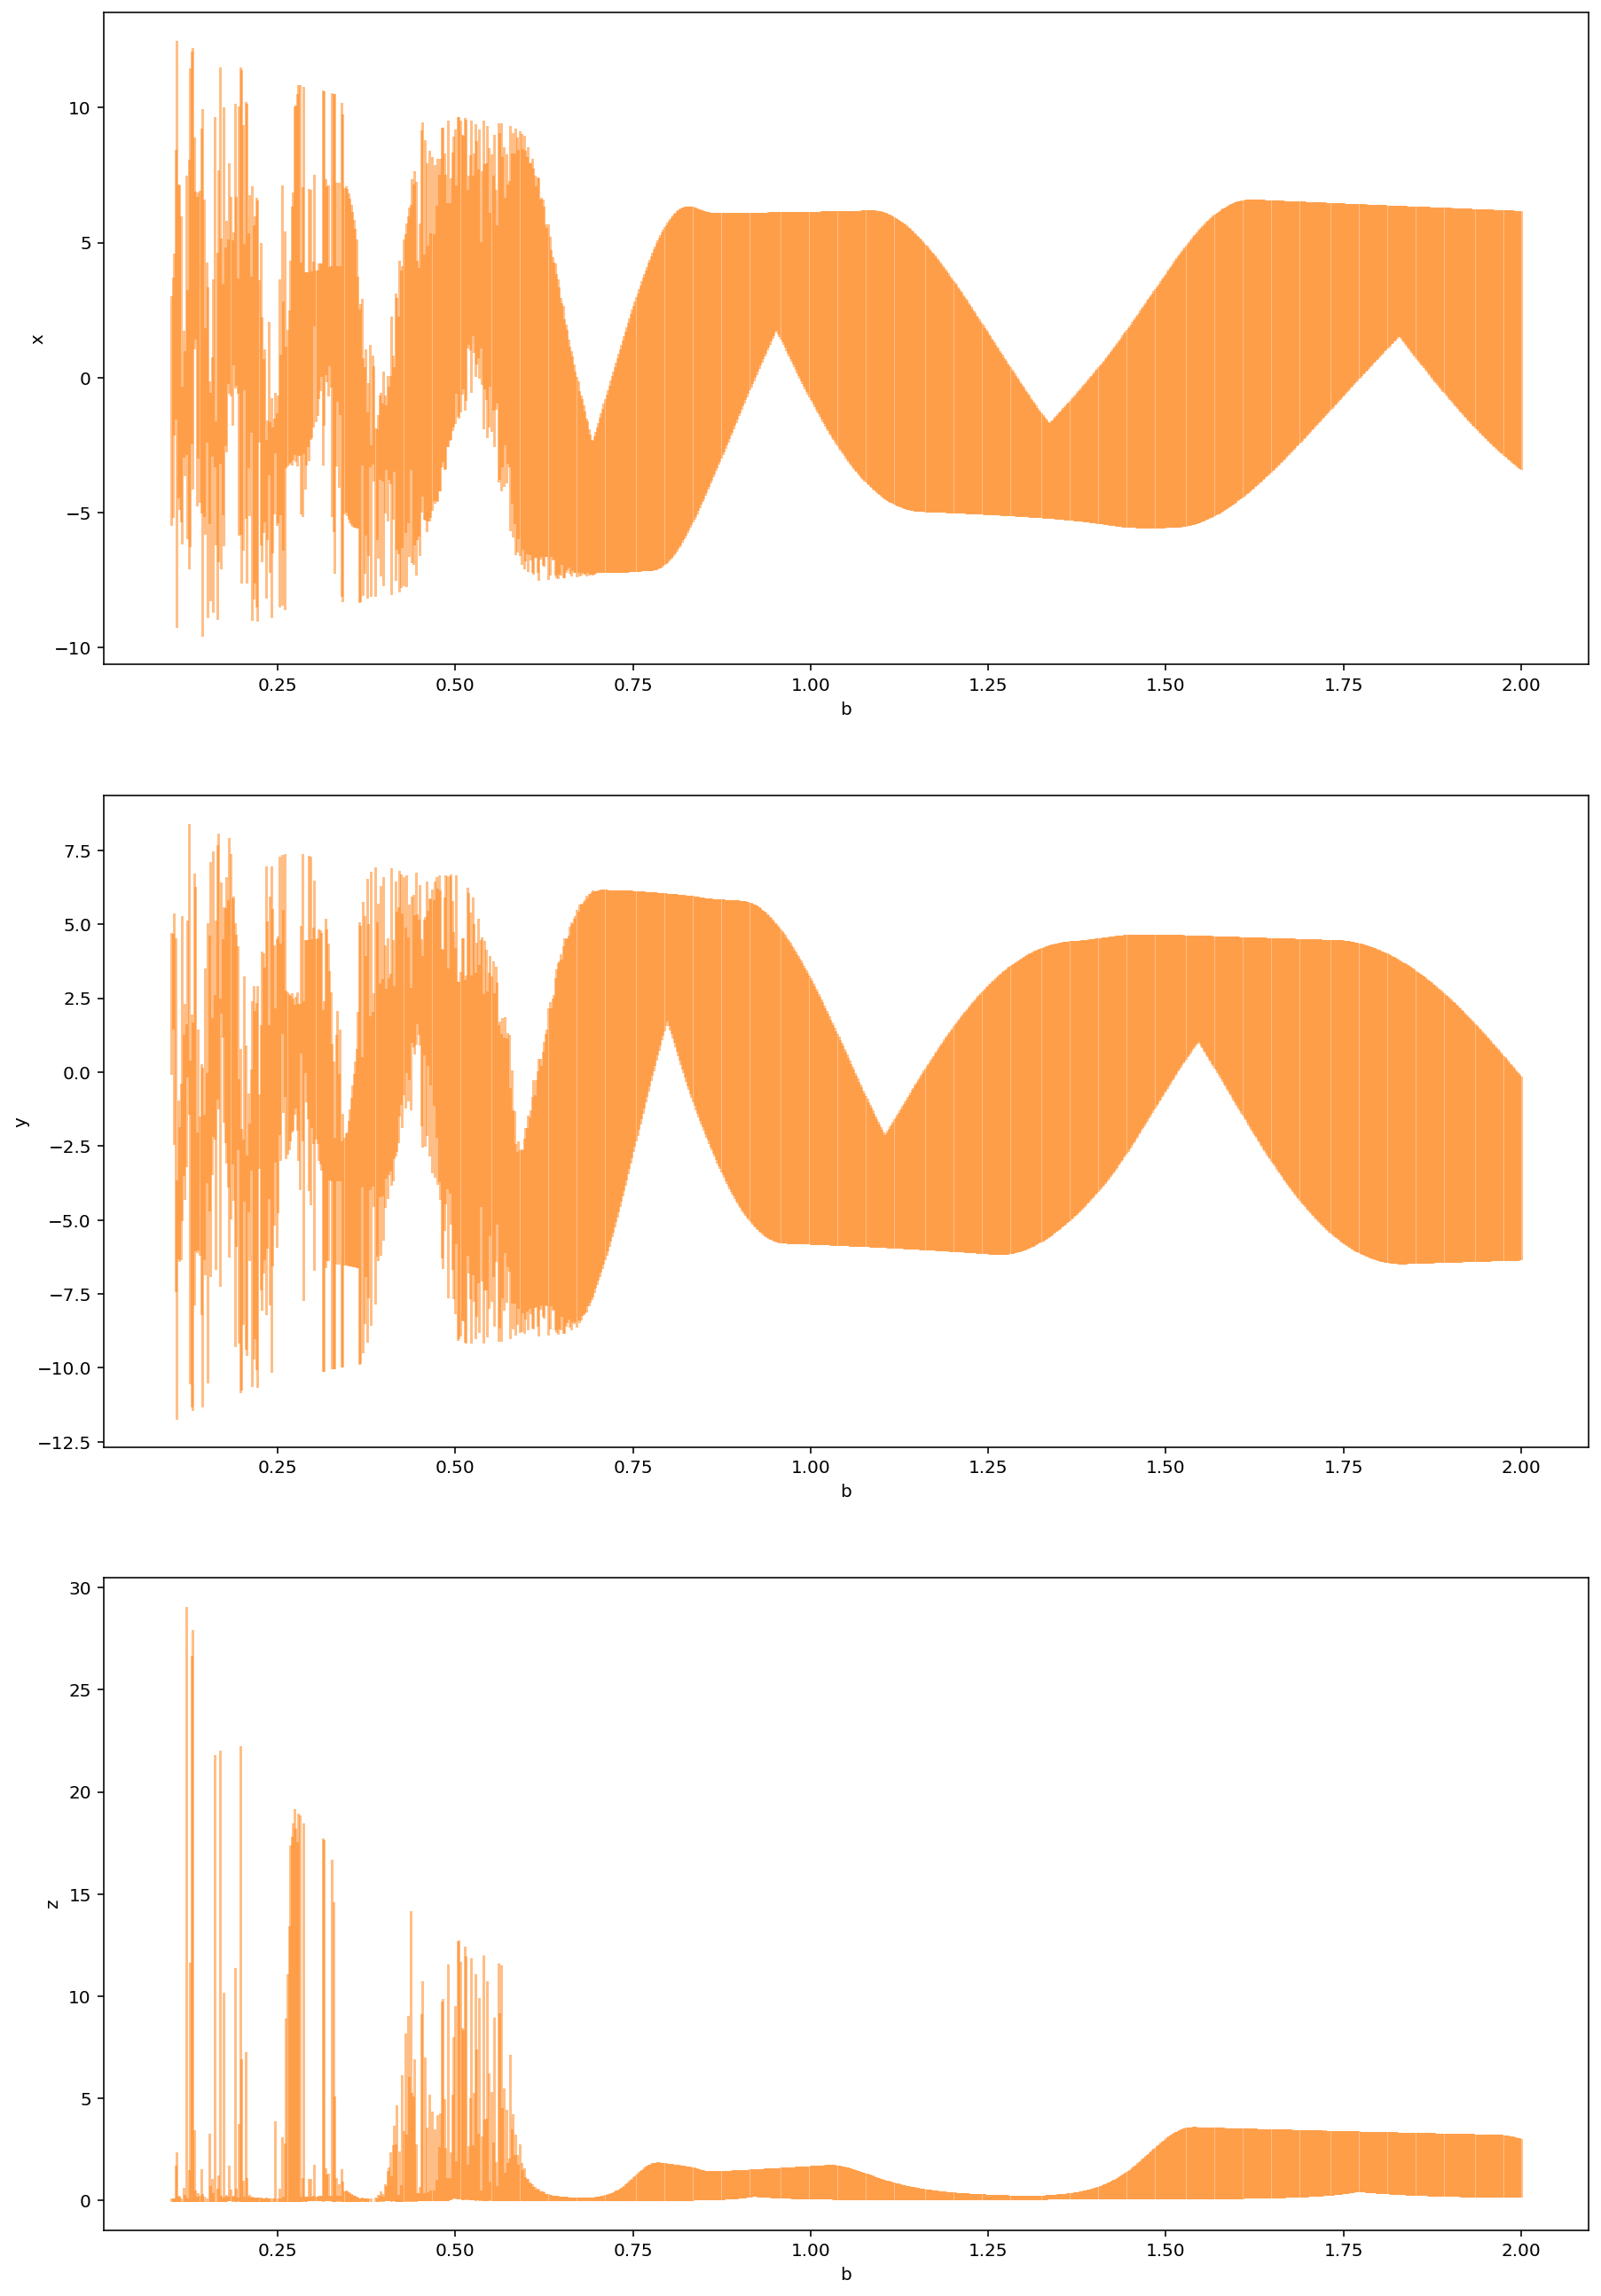

In [141]:
pts = 50
fig, ax = plt.subplots(3, 1, figsize=(15, 23))

for b in np.linspace(0.1, 2, 1000):
    traj = odeint(
        rossler3, np.array([.1, .1, .1]), np.linspace(0, 500, 10000) , args=(0.2, b, 5.7)
        )
    for i in range(3):
        ax[i].plot([b] * pts, traj[-pts:,i], '', color='C1', markersize=0.1, alpha=0.5)
        ax[i].set_xlabel('b')
        ax[i].set_ylabel(dim[i])

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative

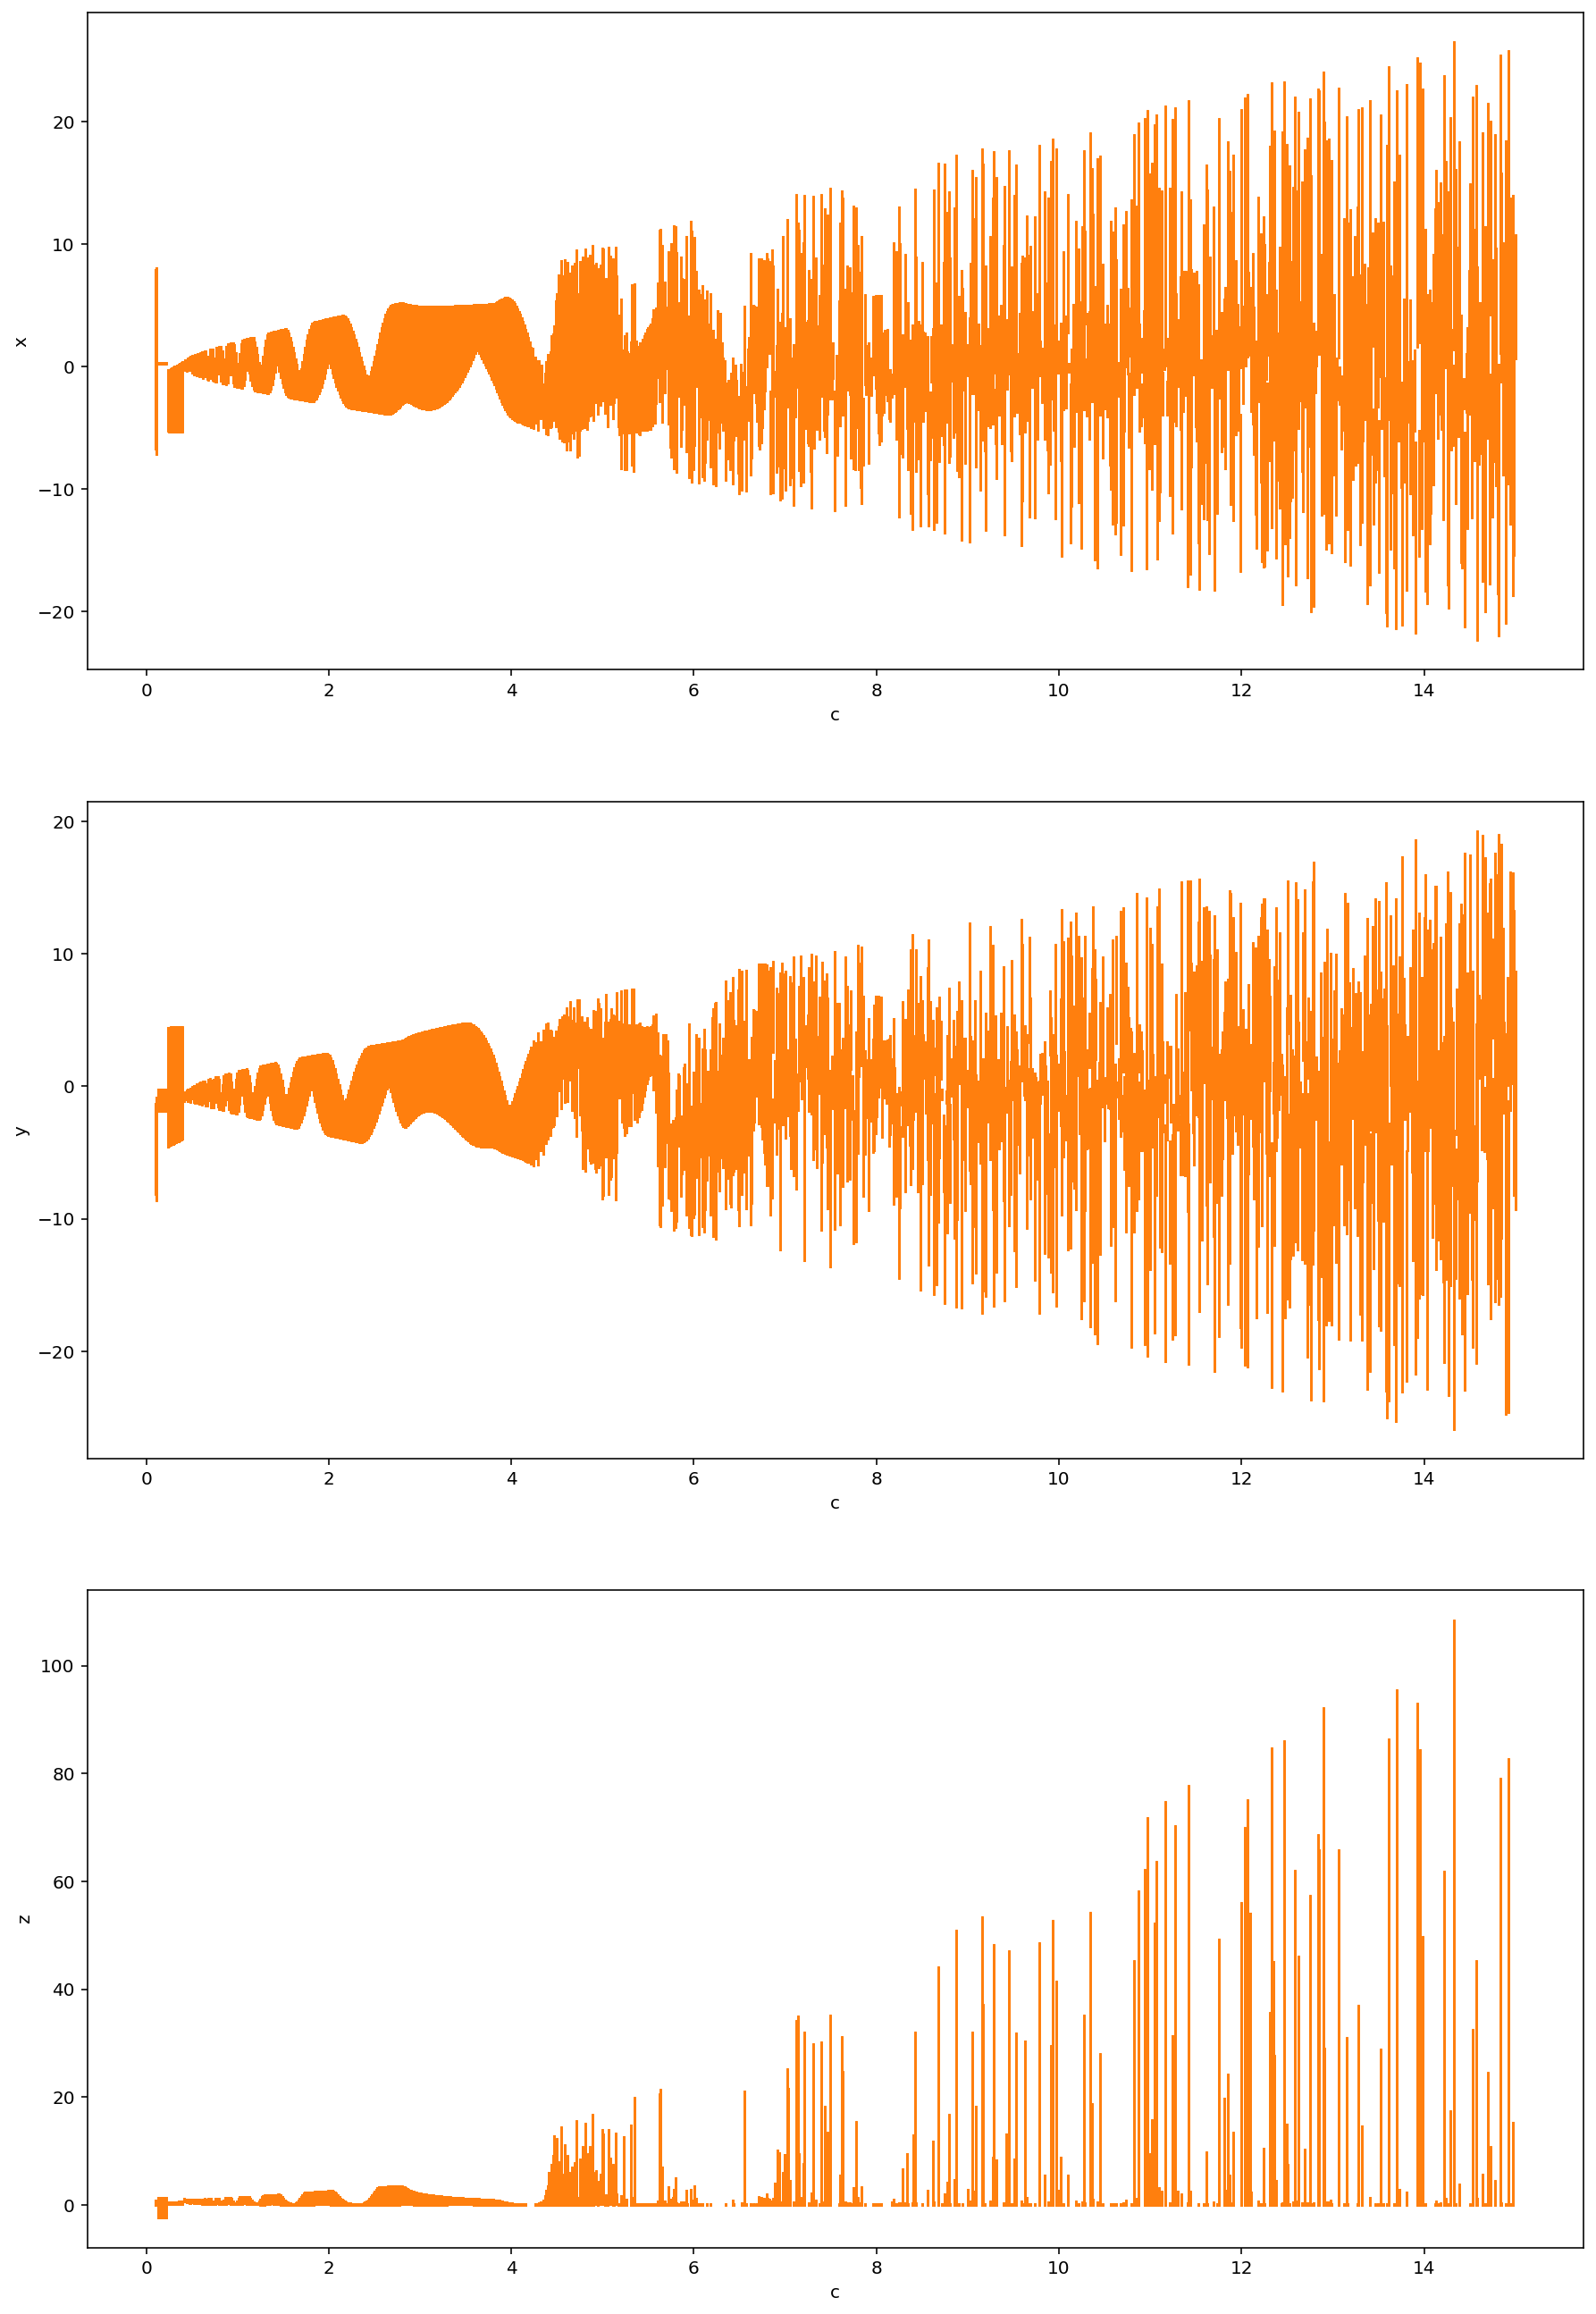

In [142]:
pts = 50
fig, ax = plt.subplots(3, 1, figsize=(15, 23))

for c in np.linspace(0.1, 15, 1000):
    traj = odeint(
        rossler3, np.array([.1, .1, .1]), np.linspace(0, 500, 10000) , args=(0.2, 0.2, c)
        )
    for i in range(3):
        ax[i].plot([c] * pts, traj[-pts:,i], '', color='C1', markersize=0.1)
        ax[i].set_xlabel('c')
        ax[i].set_ylabel(dim[i])

## Примеры для разных параметров

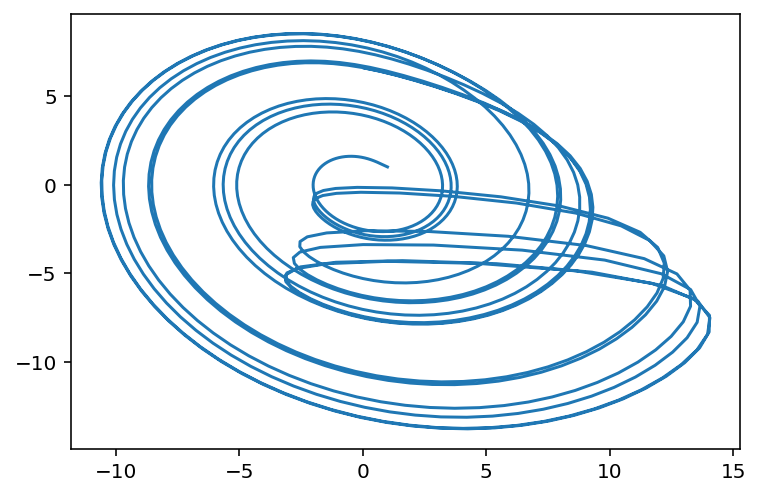

In [151]:
trajectory1 = odeint(
    rossler3, np.array([1, 1, 1]), np.linspace(0, 80, 1000), args=(0.3, 0.2, 5.7)
)
# trajectory2 = odeint(
#     rossler3, np.array([1.0001, 1.0001, 1.0001]), np.linspace(0, 100, 3000), args=(0.2, 0.2, 5.7)
# )

plt.plot(trajectory1[:, 0], trajectory1[:, 1])
# plt.plot(trajectory2[:, 0], trajectory2[:, 1])

In [152]:
go.Figure(
    [
        go.Scatter3d(
            x=trajectory1[:, 0], y=trajectory1[:, 1], z=trajectory1[:, 2], mode="lines"
        ),
        # go.Scatter3d(
        #     x=trajectory2[:, 0], y=trajectory2[:, 1], z=trajectory2[:, 2], mode="lines"
        # ),
    ]
)

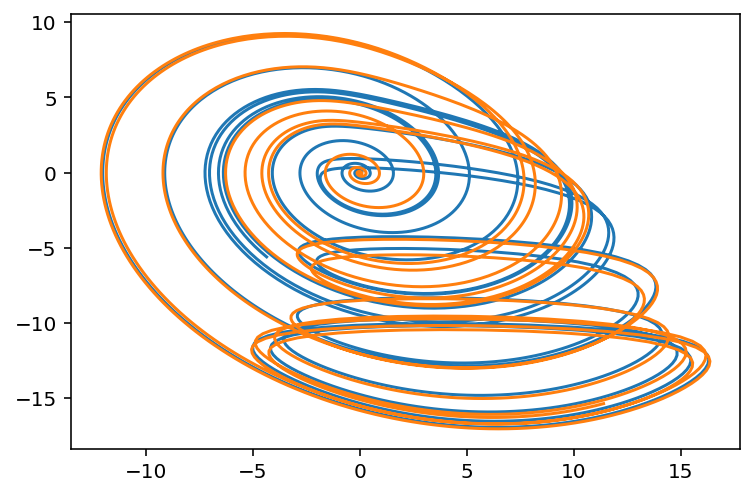

In [160]:
trajectory1 = odeint(
    rossler3, np.array([.1, .1, .1]), np.linspace(0, 80, 3000), args=(0.38, 0.2, 5.7)
)
trajectory2 = odeint(
    rossler3, np.array([.00001, .000001, .000001]), np.linspace(0, 80, 3000), args=(0.38, 0.2, 5.7)
)

plt.plot(trajectory1[:, 0], trajectory1[:, 1])
plt.plot(trajectory2[:, 0], trajectory2[:, 1])

In [161]:
go.Figure(
    [
        go.Scatter3d(
            x=trajectory1[:, 0], y=trajectory1[:, 1], z=trajectory1[:, 2], mode="lines"
        ),
        go.Scatter3d(
            x=trajectory2[:, 0], y=trajectory2[:, 1], z=trajectory2[:, 2], mode="lines"
        ),
    ]
)

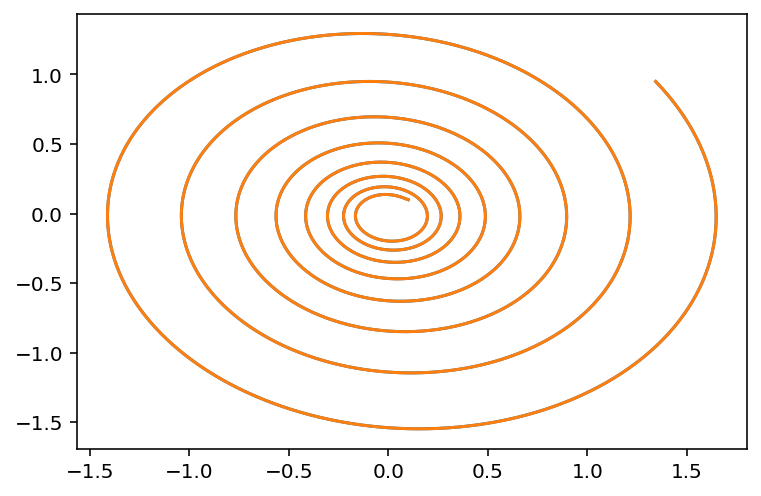

In [180]:
trajectory1 = odeint(
    rossler3, np.array([.1, .1, .1]), np.linspace(0, 50, 3000), args=(0.1, .1, 5.7)
)
trajectory2 = odeint(
    rossler3, np.array([.10001, .10001, .10001]), np.linspace(0, 50, 3000), args=(0.1, .1, 5.7)
)

plt.plot(trajectory1[:, 0], trajectory1[:, 1])
plt.plot(trajectory2[:, 0], trajectory2[:, 1])

In [182]:
go.Figure(
    [
        go.Scatter3d(
            x=trajectory1[:, 0], y=trajectory1[:, 1], z=trajectory1[:, 2], mode="lines"
        ),
        go.Scatter3d(
            x=trajectory2[:, 0], y=trajectory2[:, 1], z=trajectory2[:, 2], mode="lines"
        ),
    ]
)

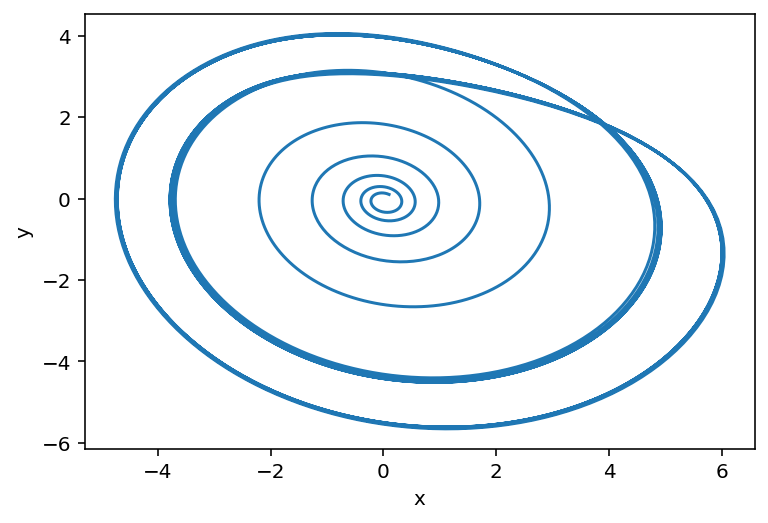

In [58]:
trajectory1 = odeint(
    rossler3, np.array([.1, .1, .1]), np.linspace(0, 120, 3000), args=(.2, .2, 3)
)
# trajectory2 = odeint(
#     rossler3, np.array([.10001, .10001, .10001]), np.linspace(0, 50, 3000), args=(0.1, .1, 5.7)
# )

plt.plot(trajectory1[:, 0], trajectory1[:, 1])
# plt.plot(trajectory2[:, 0], trajectory2[:, 1])
plt.xlabel('x')
plt.ylabel('y');

In [59]:
go.Figure(
    [
      go.Scatter3d(
                  x=trajectory1[:, 0], y=trajectory1[:, 1], z=trajectory1[:, 2], mode="lines"
              ),
    ]
)

Text(0, 0.5, 'y')

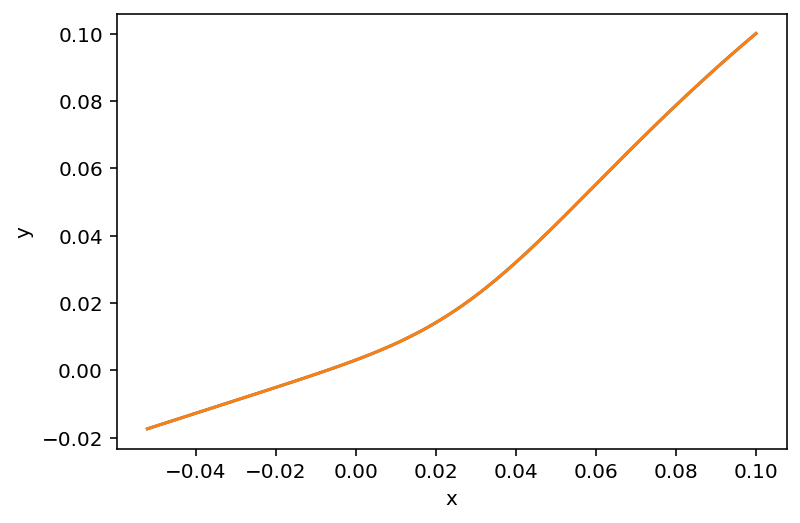

In [57]:
trajectory1 = odeint(
    rossler3, np.array([.1, .1, .1]), np.linspace(0, 50, 3000), args=(-3, .1, 5.7)
)
trajectory2 = odeint(
    rossler3, np.array([.10001, .10001, .10001]), np.linspace(0, 50, 3000), args=(-3, .1, 5.7)
)

plt.plot(trajectory1[:, 0], trajectory1[:, 1])
plt.plot(trajectory2[:, 0], trajectory2[:, 1])
plt.xlabel('x')
plt.ylabel('y');

In [56]:
go.Figure(
    [
        go.Scatter3d(
            x=trajectory1[:, 0], y=trajectory1[:, 1], z=trajectory1[:, 2], mode="lines"
        ),
        go.Scatter3d(
            x=trajectory2[:, 0], y=trajectory2[:, 1], z=trajectory2[:, 2], mode="lines"
        ),
    ]
)

## Пуанкаре

In [125]:
x_section = 0.1

def rosslerr(t, X, a, b, c):
    x, y, z = X
    return np.array([-y - z, x + a * y, b + z * (x - c)])

def poincare(t, vector, a, b, c):
    x = vector[0]
    return x - x_section

poincare.direction = -1
sol = solve_ivp(rosslerr,
               [0, 10000],
               [-0.2, 0.2, 5.2],
               events=poincare,
               dense_output=True,
                args=[0.2, 0.2, 5.7])

sol.t_events;

In [126]:
trajectory1 = odeint(
    rossler3, np.array([-0.2, 0.2, 5.2]), np.linspace(0, 500, 3000), args=(0.2, 0.2, 5.7)
)
times = sol.t_events[0]
trajectory2 = sol.sol(times).T

In [127]:
go.Figure(
    [
        go.Scatter3d(
            x=trajectory1[:, 0], y=trajectory1[:, 1], z=trajectory1[:, 2], mode="lines"
        ),
        go.Scatter3d(
            x=trajectory2[:, 0], y=trajectory2[:, 1], z=trajectory2[:, 2], mode="markers"
        ),
    ]
)

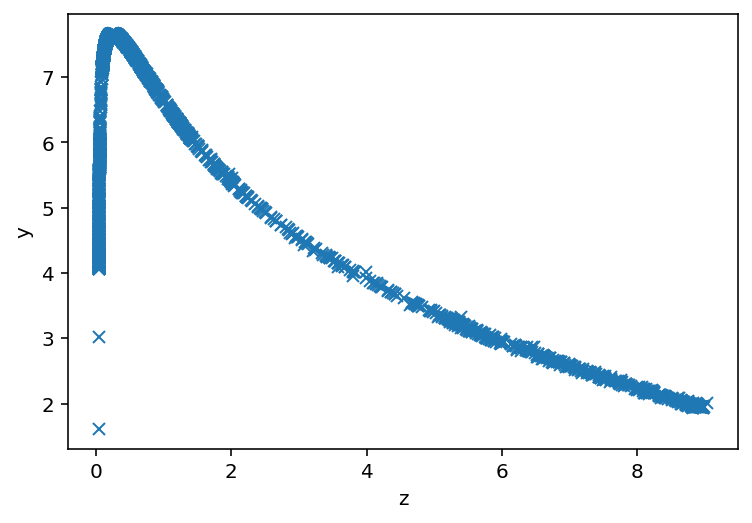

In [47]:
plt.plot(trajectory2[:,2], trajectory2[:,1], 'x')
plt.xlabel('z')
plt.ylabel('y');

In [53]:
x_section = 0.1

def rosslerr(t, X, a, b, c):
    x, y, z = X
    return np.array([-y - z, x + a * y, b + z * (x - c)])

def poincare(t, X, a, b, c):
    return X[1] - x_section

poincare.direction = 1
sol = solve_ivp(rosslerr,
               [0, 1000],
               [.1, 0.1, .1],
               events=poincare,
               dense_output=True,
                args=[0.2, 0.2, 5.7])

sol.t_events;

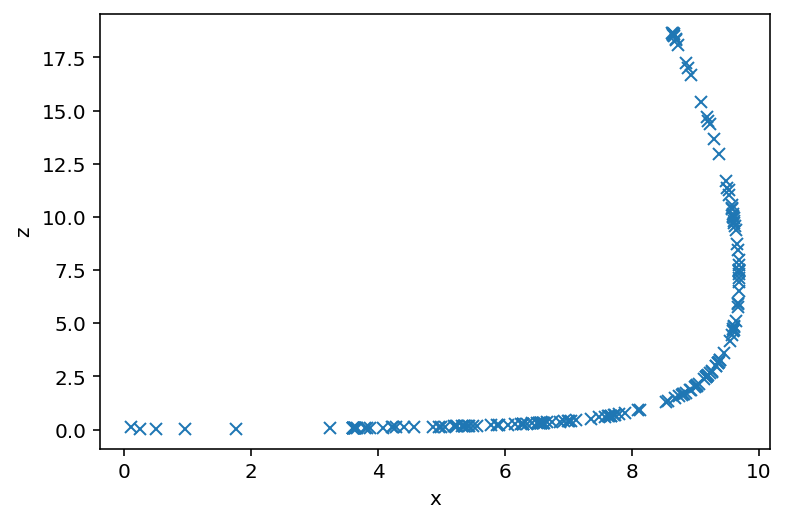

In [54]:
times = sol.t_events[0]
trajectory2 = sol.sol(times).T
plt.plot(trajectory2[:,0], trajectory2[:,2], 'x')
plt.xlabel('x')
plt.ylabel('z');

In [128]:
x_section = 0

In [132]:
x_section = 0.1

def rosslerr(t, X, a, b, c):
    x, y, z = X
    return np.array([-y - z, x + a * y, b + z * (x - c)])

def poincare(t, vector, a, b, c):
    x = vector[1]
    return x - x_section

poincare.direction = -1
sol = solve_ivp(rosslerr,
               [0, 10000],
               [-0.2, 0.2, 5.2],
               events=poincare,
               dense_output=True,
                args=[0.2, 0.2, 5.7])

sol.t_events;

In [133]:
trajectory1 = odeint(
    rossler3, np.array([-0.2, 0.2, 5.2]), np.linspace(0, 500, 3000), args=(0.2, 0.2, 5.7)
)
times = sol.t_events[0]
trajectory2 = sol.sol(times).T

In [134]:
go.Figure(
    [
        go.Scatter3d(
            x=trajectory1[:, 0], y=trajectory1[:, 1], z=trajectory1[:, 2], mode="lines"
        ),
        go.Scatter3d(
            x=trajectory2[:, 0], y=trajectory2[:, 1], z=trajectory2[:, 2], mode="markers"
        ),
    ]
)

In [135]:
x_section = 0.1

def rosslerr(t, X, a, b, c):
    x, y, z = X
    return np.array([-y - z, x + a * y, b + z * (x - c)])

def poincare(t, vector, a, b, c):
    x = vector[0]
    return x - x_section

poincare.direction = -1
sol = solve_ivp(rosslerr,
               [0, 10000],
               [-0.2, 0.2, 5.2],
               events=poincare,
               dense_output=True,
                args=[0.2, 0.2, 4])

sol.t_events;

In [136]:
trajectory1 = odeint(
    rossler3, np.array([-0.2, 0.2, 5.2]), np.linspace(0, 500, 3000), args=(0.2, 0.2, 4)
)
times = sol.t_events[0]
trajectory2 = sol.sol(times).T

In [137]:
go.Figure(
    [
        go.Scatter3d(
            x=trajectory1[:, 0], y=trajectory1[:, 1], z=trajectory1[:, 2], mode="lines"
        ),
        go.Scatter3d(
            x=trajectory2[:, 0], y=trajectory2[:, 1], z=trajectory2[:, 2], mode="markers"
        ),
    ]
)